In [1]:
%%html

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>



In [2]:
#!pip3 install jupyter_nbextensions_configurator &> /dev/null
#!jupyter nbextensions_configurator enable --user &> /dev/null

#!conda install -c conda-forge jupyter_contrib_nbextensions &> /dev/null
#!jupyter contrib nbextension install --user
#!jupyter nbextension enable python-markdown/main

In [3]:
import sympy as sym
from sympy.interactive import printing
from sympy import ask
from sympy import Q as check

import numpy as np
import matplotlib
import matplotlib.ticker as ticker

from plotting_routines import set_up_plotting
from operations import *

from functools import partial, update_wrapper

import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import Layout, Output
import notebook.nbextensions

import itertools

printing.init_printing(use_latex=True)

## Introduction

Rational functions of a single variable $x$ are simply fractions of polynomials in $x$, i.e. any $R(x)$ such that:

$R(x) = \frac{P_m(x)}{Q_n(x)}$,

where $P_m$ and $Q_n$ are polynomials, is a rational function. In the above expression, $m,n \in \mathbb{N} \cup \{0\}$, defining the degrees of $P_m$ and $Q_n$ respectively.

## Example

In [4]:
x = sym.symbols('x')
a = sym.symbols('a',real=True,positive = True)

def R_func(x,a):
    numerator = x**3 - a
    denominator = x**4 - a**4
    return (numerator/denominator,numerator,denominator)

Let us begin with a simple example of a rational function $R(x)$, {{R_func(x,a)[0]}} We will prepare for graphing it by performing a step-by-step analysis of its behaviour and then explore how the latter depends on the value of the parameter $a$. We require the following condition for $a$:



In [5]:
if sym.ask(check.positive(a)):
    print('a is strictly positive')
    a_random = 1
elif sym.ask(check.negative(a)):
    print('a is strictly negative')
    a_random= -1
elif sym.ask(check.nonpositive(a)):
    print ('a is nonpositive')
    a_random = -1
elif sym.ask(check.nonnegative(a)):
    print ('a is nonnegative')
    a_random = 1
else:
    a_random = np.random.randint(-1,2)

a is strictly positive


### Step 1. Factorization

* Whenever possible, we should try to factor $P$, the polynomial in the numerator, which in our case is {{R_func(x,a)[1]}} to see if there are any values of $x$ that yield $P(x) = 0$, where the overall function $R(x)$ will also turn into 0.


* Similarly, it is useful to try and factor $Q$: {{R_func(x,a)[2]}}
 to see if there are any $x$ such that $Q(x) = 0$, where $R(x)$ will not be defined.



In [6]:
R = R_func(x,a)[0]
P = R_func(x,a)[1]
Q = R_func(x,a)[2]

For the numerator, we get:

In [7]:
factorize(P,x)

And for the denominator:

In [8]:
factorize(Q,x)

### Step 2. Finding the function domain

* Let us look at the result of the denominator factorization. Does it look different from the initial form of $Q$?

In [9]:
factorization_dpd = ipywidgets.Dropdown(options=[' ','Yes', 'No'],
    value=' ',
    description='Answer:',
    disabled=False,)

display(factorization_dpd)

value_change_instance_fact = partial(on_value_change,problem_type = 'factorization', widget = factorization_dpd,
                                    function_setup = R_func, a_value = a_random)

factorization_dpd.observe(value_change_instance_fact, names='value')


Dropdown(description='Answer:', options=(' ', 'Yes', 'No'), value=' ')

* Positive answer would mean that the denominator has real roots, which would affect the function domain. In particular, if you see expressions of the type $(x-q_i)$ in the factorized denominator, our function will not be defined at each such $q_i$. This happens because $Q \equiv (x-q_1) \cdot (x-q_2) \cdot (x-q_3)... = 0$ at either of $q_1, q_2, q_3, ...$, and division by 0 is effectively "prohibited".


* Negative answer means that we found no real roots of the denominator; therefore, no constraints on the domain of $R(x)$ exist, and the function is everywhere (on $\mathbb{R}$) defined.


Note that if we did manage to find some real roots in $Q$, two situations are possible:

* some or all of the $Q$ roots match with those of $P$ (e.g. $q_j = p_j$), in which case factors $(x - p_j)$ and $(x - q_j)$ in the numerator and the denominator respectively cancel out. In this case, $R(x)$ is only not defined at $x = q_j = p_j$, and the discontinuity is called removable.
       
* $P$ and $Q$ do not share any roots. In this case, $\lim_{x\to {q_j}} R(x) = \pm \infty$, and we have an infinite discontinuity. 


Which of the two situations do we have?

In [10]:
option_a = 'No cancellation occurs; therefore, there is an infinite discontinuity at the root(s) of the denominator.'
option_b = 'Some factors got cancelled, and the discontinuity is removable!'
    
discontinuity_dpd = ipywidgets.Dropdown(options=[' ',option_a,option_b],
    value=' ',
    description='Answer:',
    disabled=False,)

value_change_instance_disc = partial(on_value_change, problem_type = 'discontinuity_type', widget = discontinuity_dpd,
                                    function_setup = R_func, a_value = a_random)

display(discontinuity_dpd)
discontinuity_dpd.observe(value_change_instance_disc, names='value')    

Dropdown(description='Answer:', options=(' ', 'No cancellation occurs; therefore, there is an infinite discont…

So far, we get the following information on the behaviour of $R(x)$:

In [11]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


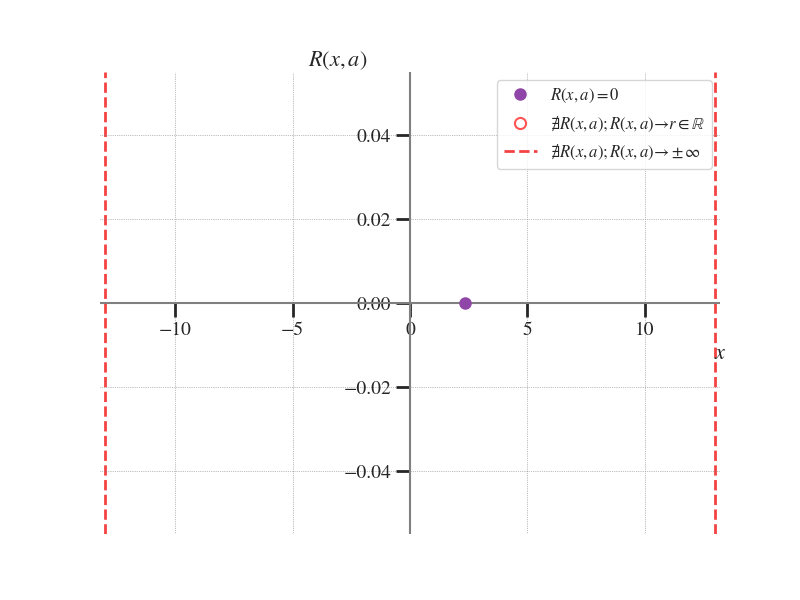

interactive(children=(IntSlider(value=10, description='a', max=20), Output()), _dom_classes=('widget-interact'…

In [12]:
%matplotlib notebook
fig, ax = set_up_plotting(8,6,'Zeros, removable discontinuities, and vertical asymptotes')
ax.set_xlabel('$x$',fontsize=16, x = 1)
ax.set_ylabel('$R(x,a)$',fontsize=16, rotation = "horizontal",y=1)

ax.grid(color='gray', linestyle=':', lw = 0.5)
ax.axhline(y = 0,color = 'gray', label = '_nolegend_', zorder = 1)
ax.axvline(x = 0, color = 'gray', label = '_nolegend_', zorder = 2)



def update_zeros_plot(a):
    
    i = len(ax.lines)
    
    while i != 2:
        
        del ax.lines[len(ax.lines)-1]
        i = i-1

    func_zeros, func_remov_disc, func_inf_disc = return_zeros(a,R_func)
    
    ax.plot(func_zeros,np.zeros(len(func_zeros)),ls='none',marker='o',
           markersize = 8, color = '#8f46a8', label = r'$R(x,a) = 0$')
    
    ax.plot(func_remov_disc,np.zeros(len(func_remov_disc)),ls='none',marker='o', markeredgewidth = 1.5,
           markersize = 8, markeredgecolor = '#ff5454', color = 'white',label = r'$\nexists R(x,a); R(x,a) \to r \in \mathbb{R}$')
    
    for every_inf_disc in func_inf_disc:
        ax.axvline(x=every_inf_disc,ls='--', lw = 2,
           markersize = 8, color = '#f44242', label = r'$\nexists R(x,a); R(x,a) \to \pm \infty$', zorder = 0)
    
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(),loc='upper right', frameon = True, fontsize = 12)
    
    
    

a = ipywidgets.IntSlider(min=0,max=20,step=1,value=10)
interactive_plot = interactive(update_zeros_plot, a = a)
output = interactive_plot.children[-1]
interactive_plot

In [13]:
find_multiplicities('denom',4,R_func)

### Step 3. Constant sign intervals

Let us know explore at which intervals in $x$ our function takes negative sign and where it goes positive.

To get an intuitive feeling of how the function behaves in terms of its sign, we (temporarily!) consider $R(x,a)$ for $\left|a\right| \in \{-1, 0, 1\}$ ($+1$ if we required $a \geq 0$, $-1$ if we required $a \leq 0$, and any integer value between $-1$ and $1$ if $a \in \mathbb{R}$. 

Keeping in mind the removable discontinuities, we simplify the function {{R_func(x,a_random)[0]}} by cancelling the common factors in the numerator and the denominator and get:

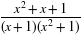

In [14]:
simplified_function(R_func,a_random)

We look once again at the zeros of this function, both those of numerator and those of denominator, but now also pay attention to their _multiplicity_ $-$ that is, which power $k_i$ corresponds to the root $r_i$. In other words, we should see each of the numerator/denominator roots, if any, appear in the form $(x - r_i)^{k_i}$, and our goal is to find each such $k_i$. Let us write the latter values down near their respective roots:

In [15]:
widget_dict = {}

all_roots = []

style = {'description_width': 'initial'}
align_kw = dict(
    _css = (('.widget-label'),)
)


num_roots =  list(find_multiplicities('num',a_random,R_func).keys())
denom_roots = list(find_multiplicities('denom',a_random,R_func).keys())

all_roots = np.sort(np.append(num_roots, denom_roots))

for i in range (0,len(all_roots)):
    
    widget_dict[all_roots[i]] = ipywidgets.Text(value=' ', disabled=False, 
                    description = r'$k$ for $r$ = ' + '$' + str(np.round(float(all_roots[i]),2)) + '$',
                    style = style, flex_flow = 'row', layout = Layout(border = 'solid 1px gray'),
                                               width = '100px')

check_button = ipywidgets.Button(description='Check', disabled=False, button_style='',
                tooltip='Check', icon='question')
try_again_button = ipywidgets.Button(description='Try again', disabled=True, button_style='',
                tooltip='Try again')

container = ipywidgets.Box(tuple(widget_dict.values()), layout=Layout(
    display='flex',
    flex_flow='column',
    align_items='stretch', width = '100%'))


display(container)
display(check_button)
display(try_again_button)

output = ipywidgets.Output()
display(output)


def when_we_click_check_button(change):
    
    for each_root in all_roots:
        if int(widget_dict[each_root].value) == true_answers(P,Q,R_func,a_random)['multiplicity'][each_root]:
            with output:
                widget_dict[each_root].layout = Layout(border = 'solid 2px #31aa6e')
                widget_dict[each_root].value = str(widget_dict[each_root].value) + ' : Correct!'
                
            
        else:
            with output:
                widget_dict[each_root].layout = Layout(border = 'solid 2px #f95757')
                widget_dict[each_root].value = str(widget_dict[each_root].value) + ' : Wrong!'
                
    check_button.disabled = True
    try_again_button.disabled = False
    
            
def when_we_click_try_again_button(change):
    with output:
        clear_output()
    
    for each_root in all_roots:
        widget_dict[each_root].layout = Layout(border = 'solid 1px gray')
        widget_dict[each_root].value = ' '
        
    check_button.disabled = False
    try_again_button.disabled = True
    

check_button.on_click(when_we_click_check_button)
try_again_button.on_click(when_we_click_try_again_button)

Box(children=(Text(value=' ', description='$k$ for $r$ = $-1.0$', layout=Layout(border='solid 1px gray'), styl…

Button(description='Check', icon='question', style=ButtonStyle(), tooltip='Check')

Button(description='Try again', disabled=True, style=ButtonStyle(), tooltip='Try again')

Output()

Now that we know these multiplicities, we can play a game called _Snake_. The rules are as follows:
* the snake runs from $-\infty$ on $x$-axis, where it continuously takes the sign of our simplified function evaluated at a large negative value of $x$...
* ... just until it hits the first numerator/denominator root of the simplified function. When it does, it either turns and changes the sign if the multiplicity of that root is odd, or continues its lazy motion in the same half-plane if the multiplicity of that root is even.
* The above is repeated once the subsequent roots appear on the snake's path: 

  Odd root multiplicity = rotate and change the sign;
  
  Even root multiplicity = stay on the same side.
  
In practice, this means the following:

<IPython.core.display.Javascript object>


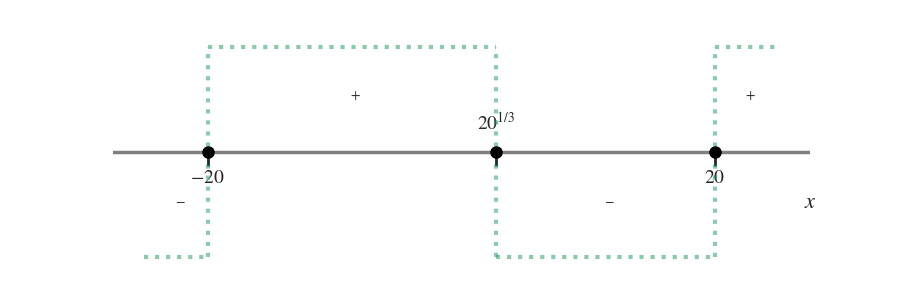

interactive(children=(IntSlider(value=0, description='a', max=20), Output()), _dom_classes=('widget-interact',…

In [17]:
snake_fig, snake_ax = set_up_plotting(9,3,'Constant sign intervals')
snake_ax.axes.get_yaxis().set_visible(False)
snake_ax.spines['left'].set_position('zero')
snake_ax.spines['bottom'].set_position('zero') 
snake_ax.axhline(y = 0, color = 'gray', label = '_nolegend_', lw = 2.5)
snake_ax.set_xlabel('$x$', fontsize = 16, x = 1)

def build_snake(function_setup, a):
    
    i = len(snake_ax.collections)
    while i > 0:
        del snake_ax.collections[i-1]
        i = i-1
        
    j = len(snake_ax.lines)
    while j > 1:
        del snake_ax.lines[j-1]
        j = j-1
        
    k = len(snake_ax.texts)
    while k > 0:
        del snake_ax.texts[k-1]
        k = k-1

    
    x = variables_setup()[0]
    
    P,Q = function_setup(x,a)[1], function_setup(x,a)[2]
    
    local_num_roots =  list(find_multiplicities('num',a,function_setup).keys())
    local_denom_roots = list(find_multiplicities('denom',a,function_setup).keys())

    all_local_roots = np.sort(np.append(local_num_roots, local_denom_roots))
    local_str_roots = []
    
    for i in range(0,len(all_local_roots)):
        all_local_roots[i] = all_local_roots[i]
        if '*sqrt' in str(all_local_roots[i]):
            str_label = r'$' + str(all_local_roots[i]).replace('*sqrt(','\cdot \sqrt{').replace(')','}$')
        elif '**' in str(all_local_roots[i]):
            str_label = r'$' + str(all_local_roots[i]).replace('**(','^{').replace(')','}$').replace('*','\cdot')
        else:
            str_label = '$' + str(all_local_roots[i]) + '$'
        local_str_roots = np.append(local_str_roots, str_label)
    
    x = variables_setup()[0]
    
    try:
        xstart = int(min(all_local_roots)) - 5
        xend = int(max(all_local_roots)) + 5

        snake_ax.set(xticks=all_local_roots, xticklabels = local_str_roots)

        index_range = np.arange(0,len(all_local_roots),1)

        for i in index_range:

            snake_ax.plot(all_local_roots[i],0,marker = 'o', markersize = 8, color = 'black')

            if (i-1) not in index_range:
                trial_value = all_local_roots[i] - 100
                trial_sign = sign(function_setup, trial_value, a)
                snake_ax.hlines(y=trial_sign, xmin = xstart, xmax = all_local_roots[i], lw = 3, color = '#1c965d', 
                                linestyles = 'dotted', alpha = 0.5)
                if trial_sign == -1:
                    snake_ax.text((xstart+all_local_roots[i])/2. - 0.1, -0.5, '$-$',
                                 fontsize = 10)
                else:
                    snake_ax.text((xstart+all_local_roots[i])/2. - 0.1, +0.5, '$+$',
                                 fontsize = 10)

            if (i+1) not in index_range:
                trial_value = all_local_roots[i] + 100
                trial_sign = sign(function_setup, trial_value, a)
                snake_ax.hlines(y=trial_sign, xmin = all_local_roots[i], xmax = xend, lw = 3, color = '#1c965d', 
                                linestyles = 'dotted', alpha = 0.5)
                if trial_sign == -1:
                    snake_ax.text((xend+all_local_roots[i])/2. - 0.1, -0.5, '$-$',
                                 fontsize = 10)
                else:
                    snake_ax.text((xend+all_local_roots[i])/2. - 0.1, +0.5, '$+$',
                                 fontsize = 10)

            else:
                trial_value = np.random.uniform(all_local_roots[i],all_local_roots[i+1])
                trial_sign = sign(function_setup, trial_value, a)
                snake_ax.hlines(y=trial_sign, xmin = all_local_roots[i], xmax = all_local_roots[i+1], lw = 3, 
                                color = '#1c965d',  linestyles = 'dotted', alpha = 0.5)

                if trial_sign == -1:
                    snake_ax.text((all_local_roots[i]+all_local_roots[i+1])/2. - 0.1, -0.5, '$-$',
                                 fontsize = 10)
                else:
                    snake_ax.text((all_local_roots[i]+all_local_roots[i+1])/2. - 0.1, +0.5, '$+$',
                                 fontsize = 10)



            if true_answers(P,Q,function_setup,a)['multiplicity'][all_local_roots[i]] % 2 != 0:
                    snake_ax.vlines(x = all_local_roots[i], ymin = -1, ymax = 1, lw = 3, color = '#1c965d',
                                  linestyles = 'dotted', alpha = 0.5)

            else:
                if trial_sign == -1:
                    snake_ax.vlines(x = all_local_roots[i], ymin = trial_sign, ymax = 0, lw = 3, color = '#1c965d', 
                                linestyles = 'dotted', alpha = 0.5)
                else:
                    snake_ax.vlines(x = all_local_roots[i], ymin = 0, ymax = trial_sign, lw = 3, color = '#1c965d', 
                                linestyles = 'dotted', alpha = 0.5)

            dy = itertools.cycle([0,40/72.])


            for label in snake_ax.xaxis.get_majorticklabels():
                label.set_position((label.get_position()[0],next(dy)))
    except ValueError:
        snake_ax.set_xticks([])
        trial_sign = sign(function_setup, 0, a)
        snake_ax.axhline(y=trial_sign, xmin = 0, xmax = 1, lw = 3, 
                                color = '#1c965d',  ls = 'dotted', alpha = 0.5) 
            
                

a = ipywidgets.IntSlider(min=0,max=20,step=1,value=0)
interactive_plot = interactive(build_snake, a = a, function_setup = fixed(R_func))
output = interactive_plot.children[-1]
interactive_plot



The above schematic very roughly and yet accurately tells us where our chosen function changes sign.
If the same approach is applied for this function's derivative in Step 5, we will also be able to find the intervals where it increases/decreases monotonically.

## Step 4. Local minima & maxima

## Step 5. Intervals of monotonicity

## Step 6. Asymptotes

## Step 7. Limits at $\infty$

## Step 8. Pulling it all together

(In the last step, we will combine all of the discovered function properties on one plot, suggest the student to pick one plot from three/four similar ones based on this summary, and finally show the correct result).